In [1]:
%matplotlib inline

#import mumpce_py as mumpce
import mumpce
import numpy as np
import mumpce.toy

In [2]:
experiment_number = 0
my_model = mumpce.toy.toy_model(experiment_number)
my_model.get_model_parameter_info()

array([{'parameter_number': 0, 'parameter_name': 'Parameter 1'},
       {'parameter_number': 1, 'parameter_name': 'Parameter 2'},
       {'parameter_number': 2, 'parameter_name': 'Parameter 3'},
       {'parameter_number': 3, 'parameter_name': 'Parameter 4'},
       {'parameter_number': 4, 'parameter_name': 'Parameter 5'},
       {'parameter_number': 5, 'parameter_name': 'Parameter 6'},
       {'parameter_number': 6, 'parameter_name': 'Parameter 7'}], dtype=object)

In [3]:
my_model.evaluate()

1.2214027581601699

In [4]:
V,S = my_model.sensitivity(0.0000001)

Value =  1.22140275816
Param  Value+       Value-           Sensitivity
     0  1.22140e+00   1.22140e+00   1.0000e+00
     1  1.22140e+00   1.22140e+00   6.0000e-01
     2  1.22140e+00   1.22140e+00   4.0000e-01
     3  1.22140e+00   1.22140e+00   1.0000e-01
     4  1.22140e+00   1.22140e+00   3.0000e-02
     5  1.22140e+00   1.22140e+00   1.0000e-02
     6  1.22140e+00   1.22140e+00   2.0000e-02


In [5]:
toy_measurements = mumpce.toy.toy_initialize('mumpce_toy_experiments.xlsx',mumpce.toy.toy_model)
toy_apps = mumpce.toy.toy_initialize('mumpce_toy_apps.xlsx',mumpce.toy.toy_app)

In [6]:
for meas in toy_measurements:
    print(meas.name)
    meas.evaluate_sensitivity(perturbation=0.0000000001)
for meas in toy_apps:
    print (meas.name)
    meas.evaluate_sensitivity(perturbation=0.0000000001)

Experiment 1
Value =  1.22140275816
Param  Value+       Value-           Sensitivity
     0  1.22140e+00   1.22140e+00   1.0000e+00
     1  1.22140e+00   1.22140e+00   6.0000e-01
     2  1.22140e+00   1.22140e+00   4.0000e-01
     3  1.22140e+00   1.22140e+00   1.0000e-01
     4  1.22140e+00   1.22140e+00   3.0000e-02
     5  1.22140e+00   1.22140e+00   1.0001e-02
     6  1.22140e+00   1.22140e+00   2.0000e-02
Experiment 2
Value =  0.548811636094
Param  Value+       Value-           Sensitivity
     0  5.48812e-01   5.48812e-01   2.0000e-02
     1  5.48812e-01   5.48812e-01   6.0000e-01
     2  5.48812e-01   5.48812e-01   1.0000e+00
     3  5.48812e-01   5.48812e-01   2.9999e-02
     4  5.48812e-01   5.48812e-01   1.0000e-01
     5  5.48812e-01   5.48812e-01   1.0000e-02
     6  5.48812e-01   5.48812e-01   4.0000e-01
Experiment 3
Value =  1.6487212707
Param  Value+       Value-           Sensitivity
     0  1.64872e+00   1.64872e+00   1.0000e+00
     1  1.64872e+00   1.64872e+00   4.00

In [7]:
my_project = mumpce.Project(measurement_list=toy_measurements,
                             application_list=toy_apps,
                             model=mumpce.toy.toy_model,
                             parameter_uncertainties=mumpce.toy.parameter_uncertainties)


In [8]:
my_project_with_init = mumpce.Project(parameter_uncertainties=mumpce.toy.parameter_uncertainties,
                                      initialize_function=mumpce.toy.toy_initialize)
my_project_with_init.measurement_initialize('mumpce_toy_experiments.xlsx')
my_project_with_init.application_initialize('mumpce_toy_apps.xlsx')

In [9]:
print(my_project[0])
print(my_project['Experiment 1'])

Experiment 1 (Active): 0
Experiment 1 (Active): 0


In [10]:
my_project.find_sensitivity()

Experiment 1
Value =  1.22140275816
Param  Value+       Value-           Sensitivity
     0  1.28247e+00   1.16324e+00   9.7619e-01
     1  1.25769e+00   1.18617e+00   5.8557e-01
     2  1.24547e+00   1.19780e+00   3.9035e-01
     3  1.22738e+00   1.21546e+00   9.7581e-02
     4  1.22319e+00   1.21962e+00   2.9274e-02
     5  1.22200e+00   1.22081e+00   9.7580e-03
     6  1.22260e+00   1.22021e+00   1.9516e-02
Experiment 2
Value =  0.548811636094
Param  Value+       Value-           Sensitivity
     0  5.49347e-01   5.48276e-01   1.9516e-02
     1  5.65115e-01   5.32979e-01   5.8557e-01
     2  5.76252e-01   5.22678e-01   9.7619e-01
     3  5.49616e-01   5.48009e-01   2.9274e-02
     4  5.51496e-01   5.46140e-01   9.7581e-02
     5  5.49079e-01   5.48544e-01   9.7580e-03
     6  5.59627e-01   5.38205e-01   3.9035e-01
Experiment 3
Value =  1.6487212707
Param  Value+       Value-           Sensitivity
     0  1.73116e+00   1.57021e+00   9.7619e-01
     1  1.68121e+00   1.61686e+00   3.90

In [11]:
for meas in my_project: 
    meas.evaluate_sensitivity()

Value =  1.22140275816
Param  Value+       Value-           Sensitivity
     0  1.28247e+00   1.16324e+00   9.7619e-01
     1  1.25769e+00   1.18617e+00   5.8557e-01
     2  1.24547e+00   1.19780e+00   3.9035e-01
     3  1.22738e+00   1.21546e+00   9.7581e-02
     4  1.22319e+00   1.21962e+00   2.9274e-02
     5  1.22200e+00   1.22081e+00   9.7580e-03
     6  1.22260e+00   1.22021e+00   1.9516e-02
Value =  0.548811636094
Param  Value+       Value-           Sensitivity
     0  5.49347e-01   5.48276e-01   1.9516e-02
     1  5.65115e-01   5.32979e-01   5.8557e-01
     2  5.76252e-01   5.22678e-01   9.7619e-01
     3  5.49616e-01   5.48009e-01   2.9274e-02
     4  5.51496e-01   5.46140e-01   9.7581e-02
     5  5.49079e-01   5.48544e-01   9.7580e-03
     6  5.59627e-01   5.38205e-01   3.9035e-01
Value =  1.6487212707
Param  Value+       Value-           Sensitivity
     0  1.73116e+00   1.57021e+00   9.7619e-01
     1  1.68121e+00   1.61686e+00   3.9035e-01
     2  1.69770e+00   1.60116e+0

In [12]:
my_project.find_active_parameters(0.1)

Experiment 1
Experiment 2
Experiment 3
Experiment 4
Experiment 5


In [13]:
print(my_project.active_parameters)
print(my_project.active_parameter_uncertainties)

[0 1 2 4 6]
[ 2.71828183  2.71828183  2.71828183  2.71828183  2.71828183]


In [14]:
my_project.set_active_parameters()

In [15]:
for meas in my_project:
    meas.model.loglevel=False # Suppress output in sensitivity analysis
my_project.make_response()

In [16]:
for meas in my_project:
    print (np.array([meas.response.a]))

[[ 1.    0.6   0.4   0.03  0.02]]
[[ 0.02  0.6   1.    0.1   0.4 ]]
[[ 1.    0.4   0.6   0.02  0.01]]
[[ 0.4   1.    0.01  0.6   0.1 ]]
[[ 0.03  0.1   1.    0.6   0.4 ]]
[[ 1.    0.2   0.01  0.01  0.01]]


In [17]:
my_project.run_optimization()

(5,)
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000


(array([-0.58888728,  1.12003551,  0.00704031, -1.62385897,  0.8043988 ]),
 array([[ 0.01488721, -0.01894579, -0.0104734 ,  0.01325883,  0.04734255],
        [-0.01894579,  0.04284732, -0.00131388, -0.04801795, -0.04545704],
        [-0.0104734 , -0.00131388,  0.02343655,  0.01588293, -0.05618227],
        [ 0.01325883, -0.04801795,  0.01588293,  0.08171971,  0.00875019],
        [ 0.04734255, -0.04545704, -0.05618227,  0.00875019,  0.2066927 ]]))

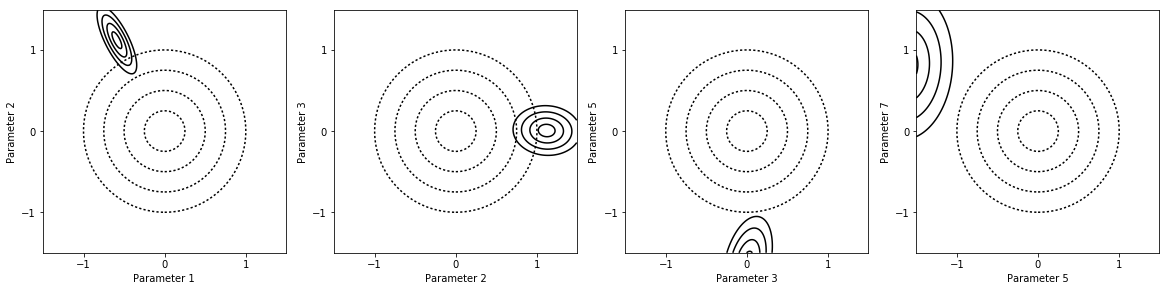

In [18]:
factors_list = [[0,1],
                [1,2],
                [2,3],
                [3,4],
               ]
fig = my_project.plot_pdfs(factors_list)

In [19]:
my_project.remove_inconsistent_measurements()

(5,)
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000

Name                  Value  Unc    OptVal OptUnc MdlVal MdlUnc
Experiment 1        :   0.40   0.05   0.25   0.04   0.20   0.62 
Experiment 2        :   0.25   0.05   0.23   0.05  -0.60   0.62 
Experiment 3        :   0.20   0.05   0.34   0.04   0.50   0.62 
Experiment 4        :   0.70   0.08   0.79   0.08   0.80   0.62 
Experiment 5        :   0.40   0.80  -0.05   0.24   0.50   0.62 
Application 1       :   0.00   0.00  -0.37   0.10   0.00   0.51 
Experiment 1 
    Uncertainty Ratio:   0.86
    Normalized Score:  -1.47
    Weighted Consistency   1.08
(5,)
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000

Name                  Value  Unc    OptVal OptUnc MdlVal MdlUnc
Experiment 2        :   0.25   0.05   0.24   0.05  -0.60   0.62 
Experiment 3        :   0.20   0.05   0.21   0.05   0.50   0.62 
Experiment 4        :   0.70   0.08   0.70   0.08   0

In [20]:
print (my_project.solution.alpha)

[[ 0.12479468  0.          0.          0.          0.        ]
 [-0.12013267  0.22624567  0.          0.          0.        ]
 [-0.10457956 -0.12695211  0.07784912  0.          0.        ]
 [ 0.05268069 -0.3544285   0.01919642  0.13432677  0.        ]
 [ 0.39559594  0.06070328 -0.1889603  -0.04967127  0.11964893]]


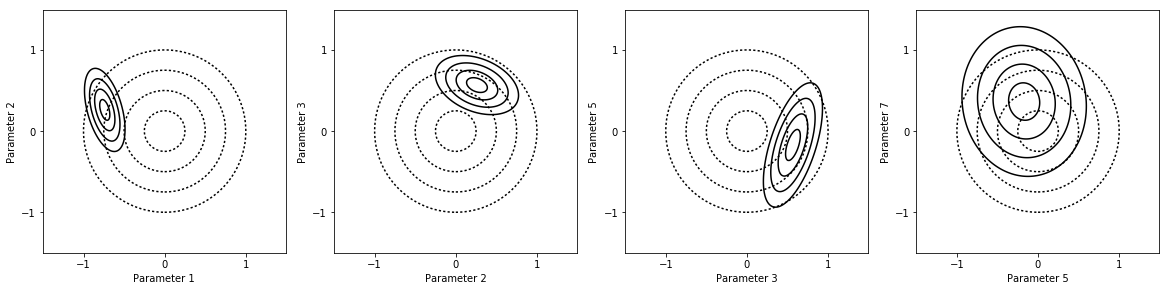

In [21]:
factors_list = [[0,1],
                [1,2],
                [2,3],
                [3,4],
               ]
fig = my_project.plot_pdfs(factors_list)

In [22]:
my_project.remove_low_information_measurements()


Name                  Value  Unc    OptVal OptUnc MdlVal MdlUnc
Experiment 2        :   0.25   0.05   0.24   0.05  -0.60   0.62 
Experiment 3        :   0.20   0.05   0.21   0.05   0.50   0.62 
Experiment 4        :   0.70   0.08   0.70   0.08   0.80   0.62 
Experiment 5        :   0.40   0.80   1.11   0.31   0.50   0.62 
Application 1       :   0.00   0.00  -0.68   0.11   0.00   0.51 
Experiment 1        :   0.40   0.05  -0.15   0.08   0.20   0.62 
Experiment 2 Entropy flux   0.002021
Experiment 3 Entropy flux   0.026705
Experiment 4 Entropy flux   0.000073
Experiment 5 Entropy flux  -0.000179
Application 1 Entropy flux  -0.028620
Experiment 1 Entropy flux   0.000000
Experiment 5 Entropy flux  -0.00

Name                  Value  Unc    OptVal OptUnc MdlVal MdlUnc
Experiment 2        :   0.25   0.05   0.24   0.05  -0.60   0.62 
Experiment 3        :   0.20   0.05   0.21   0.05   0.50   0.62 
Experiment 4        :   0.70   0.08   0.70   0.08   0.80   0.62 
Application 1       :   0.00 

In [23]:
print (my_project.solution.alpha)

[[ 0.12547508  0.          0.          0.          0.        ]
 [-0.13014049  0.24328481  0.          0.          0.        ]
 [-0.09975008 -0.13704602  0.07786079  0.          0.        ]
 [ 0.0688092  -0.38530355  0.01937665  0.13471687  0.        ]
 [ 0.39525824  0.06522259 -0.1889297  -0.04926863  0.11986361]]


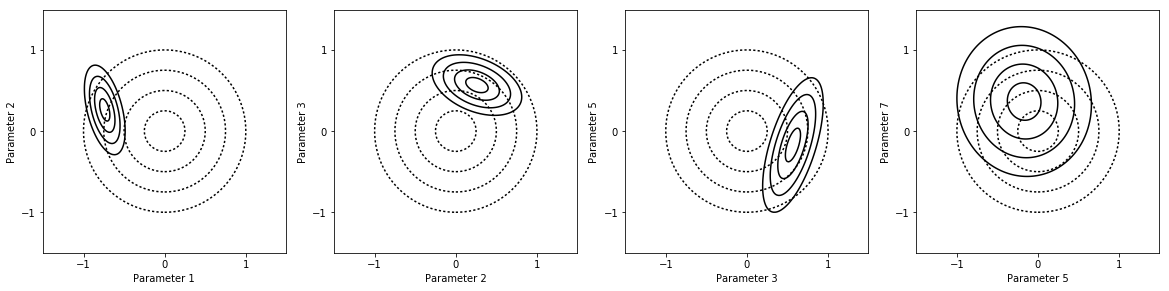

In [24]:
factors_list = [[0,1],
                [1,2],
                [2,3],
                [3,4],
               ]
fig = my_project.plot_pdfs(factors_list)

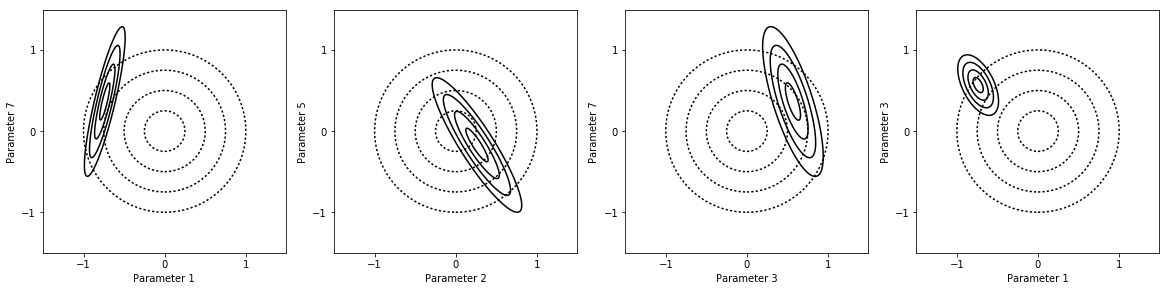

In [25]:
factors_list = [[0,4],
                [1,3],
                [2,4],
                [0,2],
               ]
fig = my_project.plot_pdfs(factors_list)

In [26]:
#my_project.interpret_model()
print(my_project.interpret_model())


Parameter name                   Value   Uncert  FactVal FactUnc NewVal  Uncert 
Parameter 1                    :    1.00    2.72   -0.74    0.25    0.48    1.29
Parameter 2                    :    1.00    2.72    0.26    0.55    1.30    1.74
Parameter 3                    :    1.00    2.72    0.57    0.37    1.76    1.45
Parameter 5                    :    1.00    2.72   -0.17    0.83    0.84    2.29
Parameter 7                    :    1.00    2.72    0.36    0.92    1.44    2.52


In [28]:
print(my_project.print_model_values())


Parameter name                   Value   Uncert 
Parameter 1                    :    1.00    2.72
Parameter 2                    :    1.00    2.72
Parameter 3                    :    1.00    2.72
Parameter 5                    :    1.00    2.72
Parameter 7                    :    1.00    2.72


In [29]:
print(my_project.validate_solution())


Name                  Value  Unc    OptVal OptUnc MdlVal MdlUnc
Experiment 2        :   0.25   0.05   0.24   0.05  -0.60   0.62 
Experiment 3        :   0.20   0.05   0.21   0.05   0.50   0.62 
Experiment 4        :   0.70   0.08   0.70   0.08   0.80   0.62 
Application 1       :   0.00   0.00  -0.68   0.11   0.00   0.51 
Experiment 1        :   0.40   0.05  -0.15   0.09   0.20   0.62 

Name                  Value  Unc    OptVal OptUnc MdlVal MdlUnc
Experiment 2        :   0.25   0.05   0.24   0.05  -0.60   0.62 
Experiment 3        :   0.20   0.05   0.21   0.05   0.50   0.62 
Experiment 4        :   0.70   0.08   0.70   0.08   0.80   0.62 
Application 1       :   0.00   0.00  -0.68   0.11   0.00   0.51 
Experiment 1        :   0.40   0.05  -0.15   0.09   0.20   0.62 
